### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics,preprocessing
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

### Loading the dataset

In [2]:
pro = pd.read_csv('../input/Bank_Personal_Loan_Modelling-1.xlsx')
pro.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### From the description provided in the dataset, we can consider 'Personal Loan' as the target variable

In [3]:
## Checking the shape of the dataset

pro.shape

(5000, 14)

In [4]:
pro.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
pro.rename(columns = {'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code',
                      'Securities Account':'Securities_Account','CD Account':'CD_Account'},inplace=True)

### Descriptive Statistics

In [6]:
pro.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

###### There are no null values present in the given dataset

In [7]:
## Checking for outliers using describe

pro.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###### From the above table, we can infere that income and Mortgage features have outliers in them.

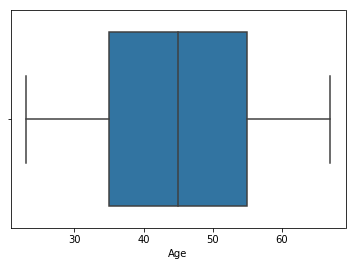

In [8]:
sns.boxplot(pro['Age'])   # No outliers in Age Feature

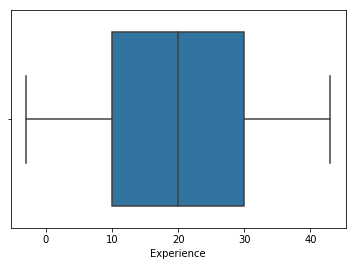

In [9]:
sns.boxplot(pro['Experience'])    # No outliers in this feature

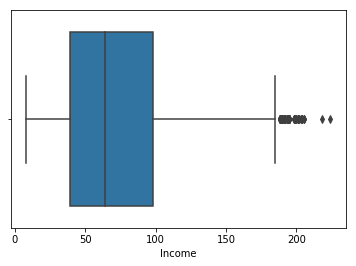

In [10]:
sns.boxplot(pro['Income'])   # There are few outliers present in the Income feature. We will treat them later

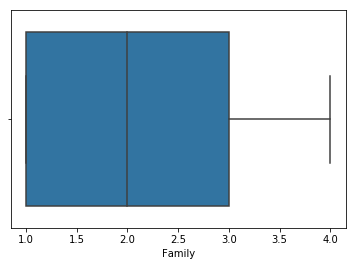

In [11]:
sns.boxplot(pro['Family'])   # No outliers

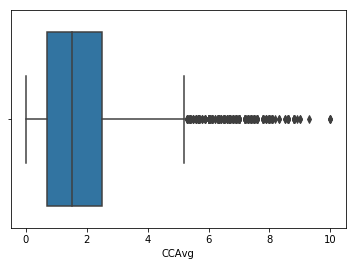

In [12]:
sns.boxplot(pro['CCAvg'])    # Outliers are present

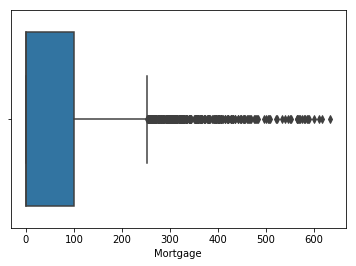

In [13]:
sns.boxplot(pro['Mortgage'])   # Many outliers are present

###### From the above graphs, we can how many outliers are present in each feature of the dataset. Most of the outliers are in Income, Mortgage, and CCAvg

We will now treat the outliers present in income feature. Since Mortgage and CCAvg are important variables related to our dataset, we are not going to remove the outliers in those two features. We will treat the outliers in Income feature by capping them with upper whisker.

In [14]:
up_whisk=pro["Income"].quantile(0.75)+1.5*(pro["Income"].quantile(0.75) - pro["Income"].quantile(0.25))

for i in pro['Income']:
    if(i > up_whisk):
        pro['Income']=pro['Income'].replace(i,up_whisk)

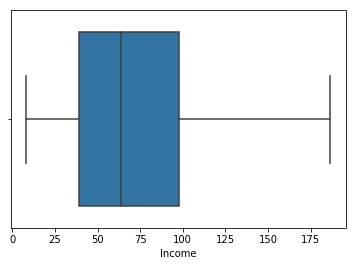

In [15]:
sns.boxplot(pro['Income'])  # From the box plot we can now see that the outliers from Income feature has been treated.

In [16]:
# Now we will drop the ID feature and ZIP Code feature as they are unrelated to our dataset

pro.drop(['ID','ZIP_Code'],axis = 1, inplace=True)

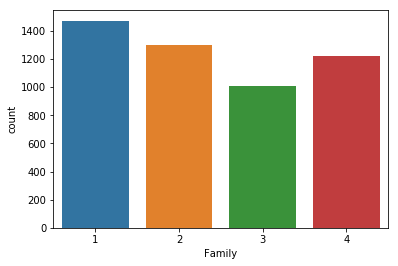

In [17]:
sns.countplot(x = pro['Family'])  # From the count plot, all families have almost equal members in it.

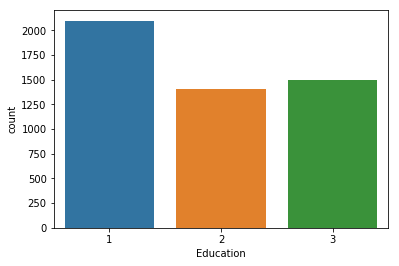

In [18]:
sns.countplot(x = pro['Education'])  # Most of the persons in the dataset are undergrads

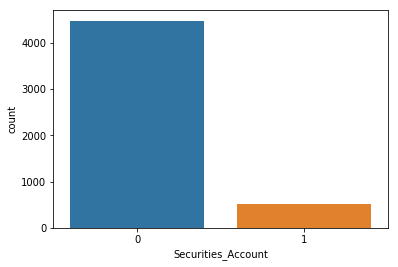

In [19]:
sns.countplot(x = pro['Securities_Account'])  # More number of people do not have securities account at the bank

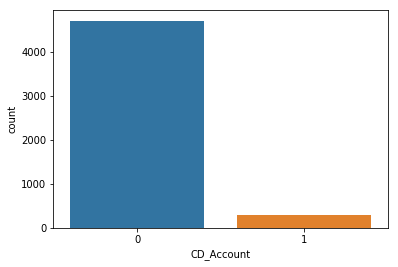

In [20]:
sns.countplot(x = pro['CD_Account']) # more customers have no CD account

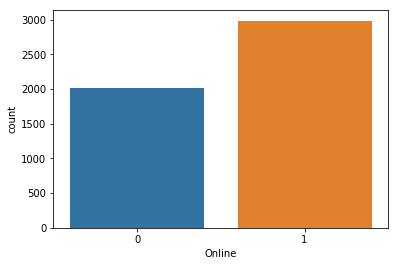

In [21]:
sns.countplot(x = pro['Online'])  # More number of customers use online transaction compared to offline transactions

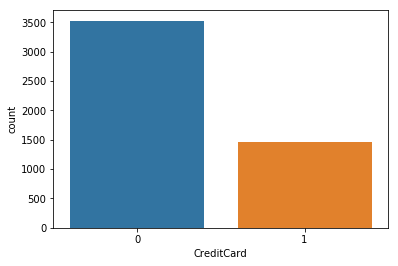

In [22]:
sns.countplot(x = pro['CreditCard']) # Not many people use credit card issued by the bank

Text(0.5, 1.0, 'Personal Loan Details')

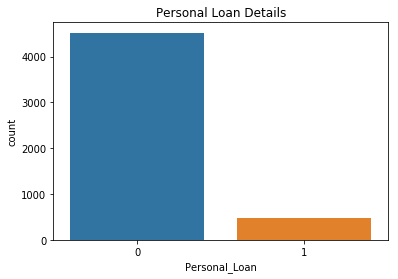

In [23]:
sns.countplot(x = pro['Personal_Loan'])  # From the graph, it is very clear that only very few customers get personal loan from the bank.
plt.title('Personal Loan Details')

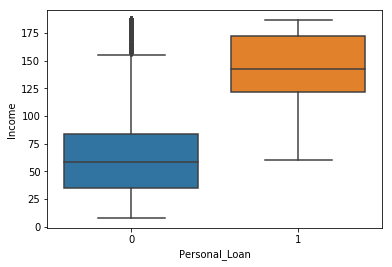

In [24]:
sns.boxplot(y='Income',x='Personal_Loan',data = pro)

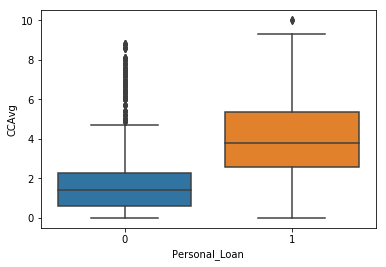

In [25]:
sns.boxplot(y='CCAvg',x='Personal_Loan',data = pro)

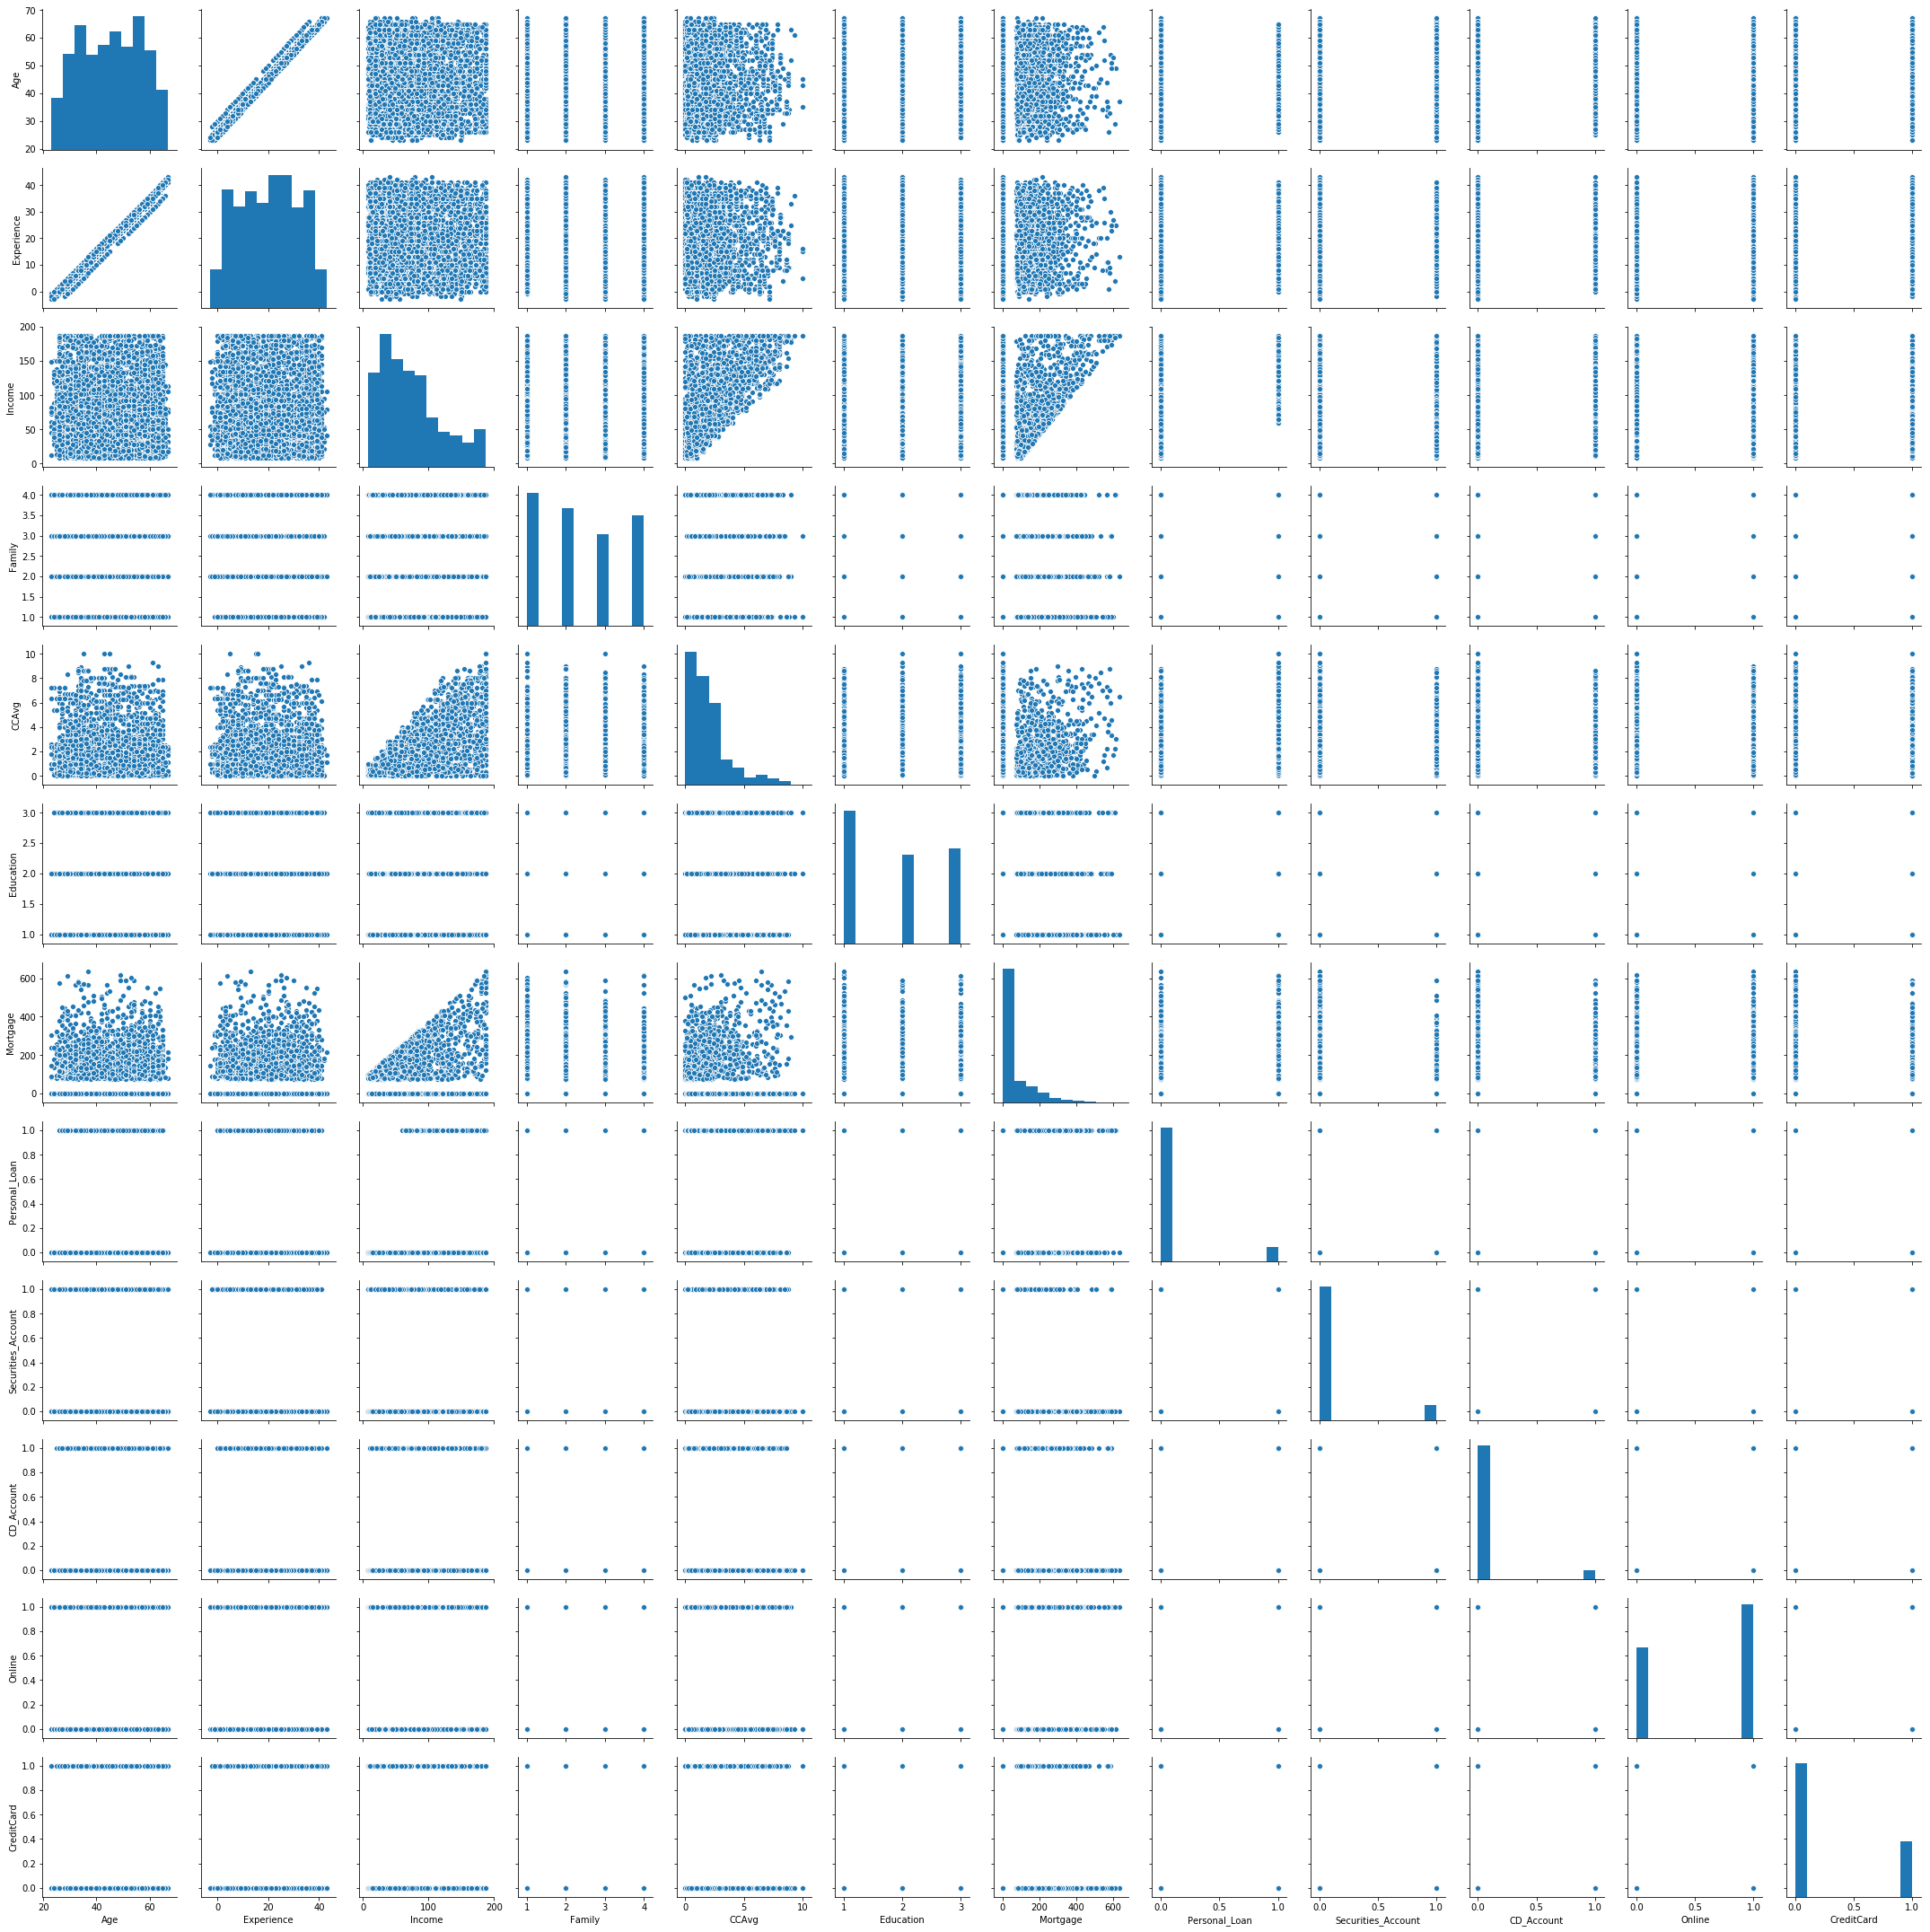

In [26]:
# We will now plot a pair plot for the remaining features in the dataset

sns.pairplot(pro)

In [27]:
# Since the pairplot shows the correlation among all the features in a graphical way, it becomes difficult to interpret using it.
# So, we will check on the correlation using heatmap and correlation matrix

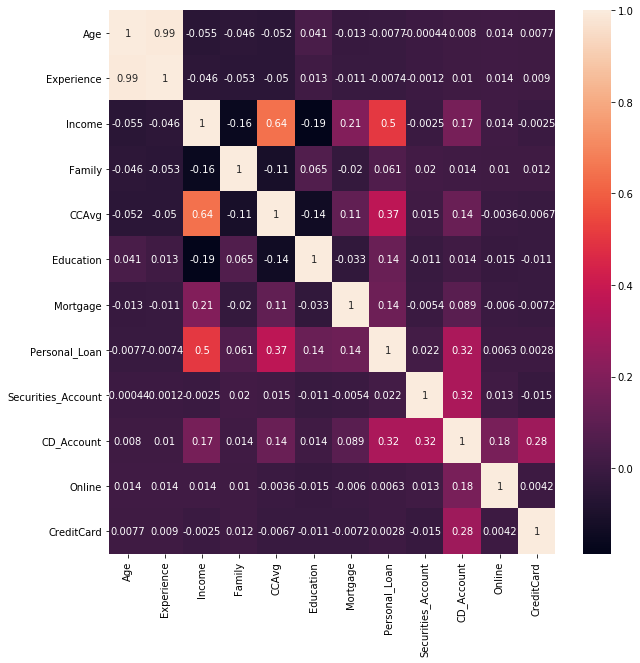

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(pro.corr(),annot = True)

In [29]:
# From the perspective of Personal Loan accpeted by the customer, we can filter the corrmap with only those who accepted the
# personal loan

pro.corr().loc['Personal_Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.504559
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

#### From the correlation map and pairplot graph, we can infere that Income, CCAvg and CD Account are more corelated to Personal Loan and hence they are the most important features for this dataset

# Unsupervised  Learning - Without Scaling Data

In [30]:
# Dropping the dependant variable from dataset for unsupervised learning

x = pro.drop('Personal_Loan',axis=1)
y_original = pro['Personal_Loan']

In [31]:
# First we will proceed with unsupervised learning using K-means clustering method
# For that we need to determine the number of clusters using the elbow graph

cluster_range = range(1,11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(x)
    cluster_errors.append(clusters.inertia_)

In [32]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:11]

,num_clusters,cluster_errors
0,1,6.346747e+07
1,2,2.588944e+07
2,3,1.571100e+07
3,4,1.071030e+07
4,5,7.752000e+06
5,6,6.546900e+06
6,7,5.396631e+06
7,8,4.733535e+06
8,9,4.243765e+06
9,10,3.905119e+06


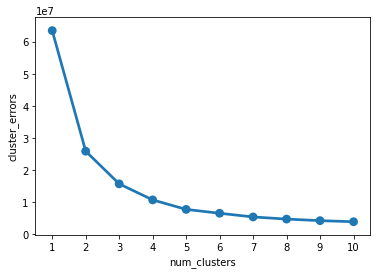

In [33]:
sns.pointplot(x=clusters_df.num_clusters,y=clusters_df.cluster_errors)

#### From the Elbow graph we can see that the number of clusters for unscaled data is 2.

In [34]:
# Now we will fir the kmean with the newly found number of clusters.

kmean = KMeans(n_clusters=2)
kmean.fit(x)

centers = kmean.cluster_centers_

In [35]:
y_kmean = list(kmean.labels_)

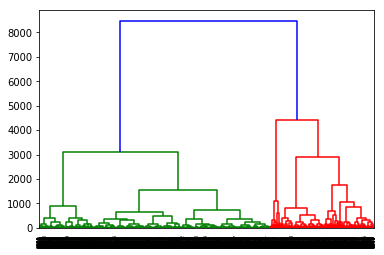

In [36]:
# Now we will check the unsupervised learning for the same dataset with Hierarchial clustering method.
# We will find the no of clusters using dendrogram

z = linkage(x,'ward')
dendrogram(z)
plt.show()

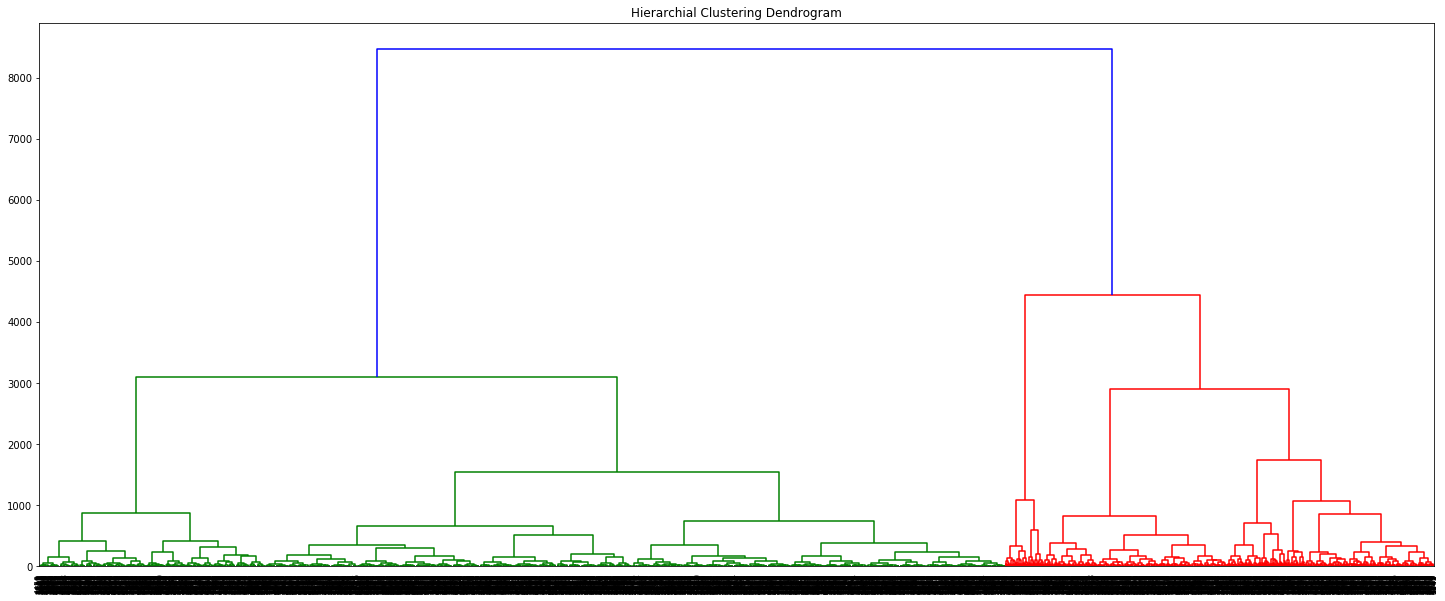

In [37]:
plt.figure(figsize=(25,10))
plt.title('Hierarchial Clustering Dendrogram')
dendrogram(z, leaf_rotation=90,leaf_font_size=8)
plt.show()

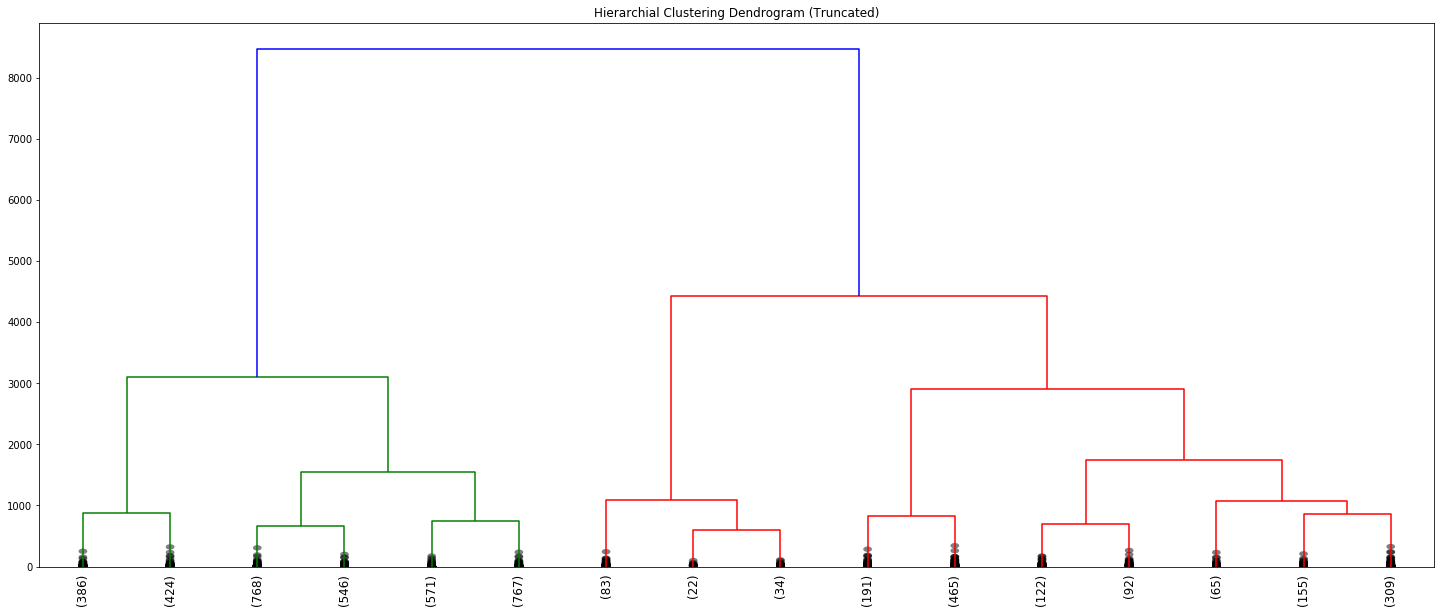

In [38]:
# We will truncate the dendrogram for easier visibility.

plt.figure(figsize=(25,10))
plt.title('Hierarchial Clustering Dendrogram (Truncated)')
dendrogram(z,truncate_mode='lastp',p = 16,show_leaf_counts=True, leaf_rotation=90,leaf_font_size=12,show_contracted=True)
plt.show()

#### From the dendrogram it is clear that the number of clusters in the given dataset is 2.

#### We will now perform Agglomerative Clustering using the number of clusters obtained above

In [39]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_hier = cluster.fit_predict(x)

In [40]:
print(metrics.accuracy_score(y_original,y_kmean))

0.765


In [41]:
print(metrics.accuracy_score(y_original,y_hier))

0.3364


## By comparing the accuracy scores obtained from K-mean and Hierarical with original target, we can see that using K-Means provide better accuracy. Hence we will use K-means Clustering from hereon.

In [42]:
# First we will perform PCA using all the available features in the dataset. We will find the required number of components using
# elbow graph and we will fit it using the found number of clusters

In [43]:
pca = PCA(n_components=11)
pca.fit_transform(x)

array([[-5.88709359e+01, -1.74489727e+01,  2.83951153e+01, ...,
        -2.04584175e-01,  8.70985027e-01, -2.58441057e-01],
       [-6.06398644e+01, -3.28942955e+01,  1.83691802e+00, ...,
        -1.89272187e-01,  8.78431370e-01, -2.37906107e-01],
       [-6.32423160e+01, -5.55897100e+01,  9.37122437e+00, ...,
        -1.97280457e-01, -2.23603936e-02,  1.58302206e-01],
       ...,
       [-6.18424147e+01, -4.34046822e+01, -2.48291464e+01, ...,
        -2.10481315e-01, -3.26494405e-02,  1.06298232e-01],
       [-5.90009543e+01, -1.86206834e+01, -2.74606630e+01, ...,
        -3.68368153e-01, -1.09982461e-01,  1.96368954e-02],
       [-5.50117856e+01,  1.62090587e+01,  2.34457137e+01, ...,
         6.05334478e-01, -1.95741204e-01, -1.48519040e-01]])

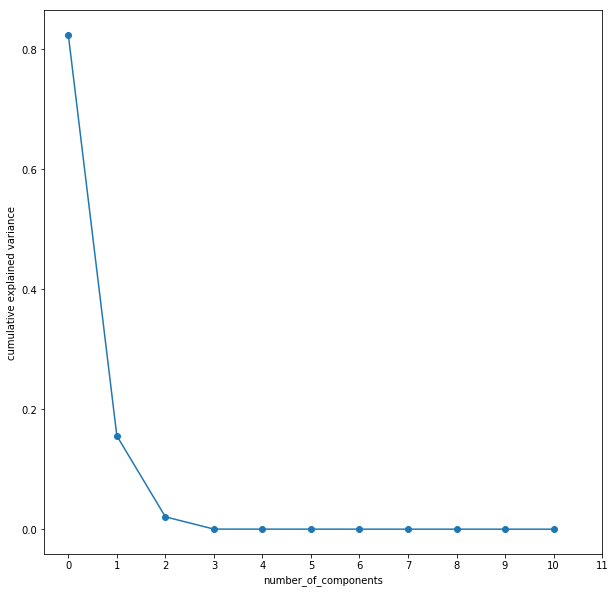

In [44]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.xlabel('number_of_components')
plt.ylabel('cumulative explained variance')
plt.xticks(range(12))
plt.show()

### From the elbow graph it is clear that the number of components required for PCA is 2

In [45]:
pca_new = PCA(n_components=2)

In [46]:
# We will split the train test data with x as unscaled x, y as y obtained from k_mean, and we will fit x data with pca

x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y_kmean,test_size = 0.3, random_state = 0)
x_train1 = pca_new.fit_transform(x_train1)
x_test1 = pca_new.transform(x_test1)

In [47]:
rf = RandomForestClassifier()
rf.fit(x_train1,y_train1)
y_pred1_rf = rf.predict(x_test1)
random_forest_unscaled = metrics.accuracy_score(y_test1,y_pred1_rf)
print(metrics.accuracy_score(y_test1,y_pred1_rf))

0.9986666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
log = LogisticRegression()
log.fit(x_train1,y_train1)
y_pred1_log = log.predict(x_test1)
log_unscaled = metrics.accuracy_score(y_test1,y_pred1_log)
print(metrics.accuracy_score(y_test1,y_pred1_log))

0.9973333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(x_train1,y_train1)
y_pred1_tree = tree.predict(x_test1)
tree_unscaled = metrics.accuracy_score(y_test1,y_pred1_tree)
print(metrics.accuracy_score(y_test1,y_pred1_tree))

0.9993333333333333


In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train1,y_train1)
y_pred1_knn = knn.predict(x_test1)
knn_unscaled = metrics.accuracy_score(y_test1,y_pred1_knn)
print(metrics.accuracy_score(y_test1,y_pred1_knn))

0.9966666666666667


In [51]:
nb = GaussianNB()
nb.fit(x_train1,y_train1)
y_pred1_nb = nb.predict(x_test1)
nb_unscaled = metrics.accuracy_score(y_test1,y_pred1_nb)
print(metrics.accuracy_score(y_test1,y_pred1_nb))

0.9546666666666667


In [52]:
svm = SVC()
svm.fit(x_train1,y_train1)
y_pred1_svm = svm.predict(x_test1)
svm_unscaled = metrics.accuracy_score(y_test1,y_pred1_svm)
print(metrics.accuracy_score(y_test1,y_pred1_svm))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9586666666666667


#### Thus the accuracy scores for all 6 models using Unscaled data is shown above

## Now we will scale the data using Standard Scalar

In [53]:
x_std = preprocessing.StandardScaler().fit_transform(x)

#### Now we will again repeat the steps above starting from fitting the data in PCA

In [54]:
pca = PCA(n_components=11)
pca.fit_transform(x_std)

array([[ 2.00668906, -1.62961759,  1.06301304, ..., -0.76041845,
        -0.042037  , -0.06612268],
       [-0.1470268 , -0.56022151,  0.80227614, ..., -0.74321423,
        -0.28676646,  0.0594403 ],
       [ 0.08511215, -1.25936773, -0.94098953, ...,  0.87755574,
        -0.74910505, -0.05579282],
       ...,
       [-2.88148044, -0.58694755, -0.53283462, ...,  0.6350795 ,
        -0.06518454, -0.10024287],
       [-2.69664481,  0.06452144, -0.1025115 , ...,  0.21177096,
         0.2340513 , -0.01665241],
       [ 1.72731313, -1.10336923,  0.71620299, ..., -0.59010972,
         0.64263364, -0.05411343]])

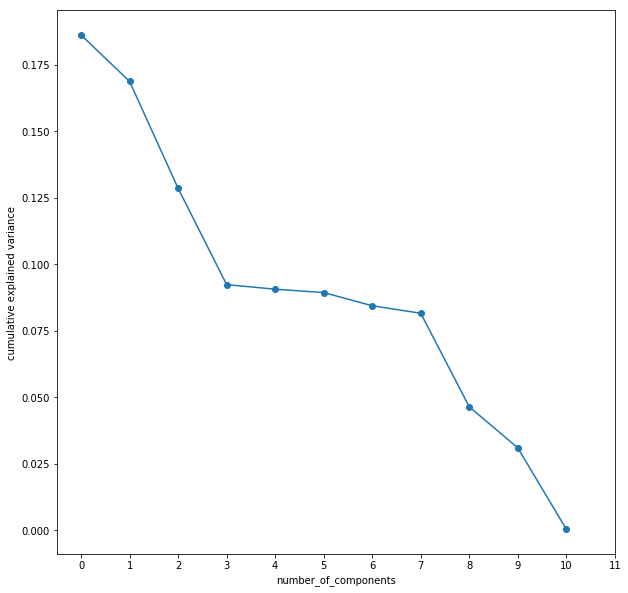

In [55]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.xlabel('number_of_components')
plt.ylabel('cumulative explained variance')
plt.xticks(range(12))
plt.show()

#### From the above elbow graph, the number of components in scaled data is 3

In [56]:
pca_new_scaled = PCA(n_components=3)

In [57]:
# We will split the train test data with x as scaled x, y as y obtained from k_mean, and we will fit x data with pca

x_train2,x_test2,y_train2,y_test2 = train_test_split(x_std,y_kmean,test_size = 0.3, random_state = 0)
x_train2 = pca_new.fit_transform(x_train2)
x_test2 = pca_new.transform(x_test2)

In [58]:
rf2 = RandomForestClassifier()
rf2.fit(x_train2,y_train2)
y_pred2_rf = rf2.predict(x_test2)
random_forest_scaled = metrics.accuracy_score(y_test2,y_pred2_rf)
print(metrics.accuracy_score(y_test2,y_pred2_rf))

0.766


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
log2 = LogisticRegression()
log2.fit(x_train2,y_train2)
y_pred2_log = log2.predict(x_test2)
log_scaled = metrics.accuracy_score(y_test2,y_pred2_log)
print(metrics.accuracy_score(y_test2,y_pred2_log))

0.7953333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
tree2 = DecisionTreeClassifier(max_depth = 4)
tree2.fit(x_train2,y_train2)
y_pred2_tree = tree2.predict(x_test2)
tree_scaled = metrics.accuracy_score(y_test2,y_pred2_tree)
print(metrics.accuracy_score(y_test2,y_pred2_tree))

0.796


In [61]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train2,y_train2)
y_pred2_knn = knn2.predict(x_test2)
knn_scaled = metrics.accuracy_score(y_test2,y_pred2_knn)
print(metrics.accuracy_score(y_test2,y_pred2_knn))

0.7646666666666667


In [62]:
nb2 = GaussianNB()
nb2.fit(x_train2,y_train2)
y_pred2_nb = nb2.predict(x_test2)
nb_scaled = metrics.accuracy_score(y_test2,y_pred2_nb)
print(metrics.accuracy_score(y_test2,y_pred2_nb))

0.794


In [63]:
svm2 = SVC()
svm2.fit(x_train2,y_train2)
y_pred2_svm = svm2.predict(x_test2)
svm_scaled = metrics.accuracy_score(y_test2,y_pred2_svm)
print(metrics.accuracy_score(y_test2,y_pred2_svm))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7973333333333333


##### Thus the accuracy of all 6 models using scaled data is shown above

## Now we will verify the above accuracy scores of unscaled data and scaled data using target as kmean with using original y as target as done in supervised learning.

In [64]:
# We will start with train test split of x and y with y as y_original from the original dataset

x_train3,x_test3,y_train3,y_test3 = train_test_split(x,y_original,test_size = 0.3, random_state = 0)

In [65]:
rf3 = RandomForestClassifier()
rf3.fit(x_train3,y_train3)
y_pred3_rf = rf3.predict(x_test3)
random_forest_original = metrics.accuracy_score(y_test3,y_pred3_rf)
print(metrics.accuracy_score(y_test3,y_pred3_rf))

0.9826666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
log3 = LogisticRegression()
log3.fit(x_train3,y_train3)
y_pred3_log = log3.predict(x_test3)
log_original = metrics.accuracy_score(y_test3,y_pred3_log)
print(metrics.accuracy_score(y_test3,y_pred3_log))

0.9553333333333334


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
tree3 = DecisionTreeClassifier(max_depth = 4)
tree3.fit(x_train3,y_train3)
y_pred3_tree = tree3.predict(x_test3)
tree_original = metrics.accuracy_score(y_test3,y_pred3_tree)
print(metrics.accuracy_score(y_test3,y_pred3_tree))

0.9806666666666667


In [68]:
knn3 = KNeighborsClassifier()
knn3.fit(x_train3,y_train3)
y_pred3_knn = knn3.predict(x_test3)
knn_original = metrics.accuracy_score(y_test3,y_pred3_knn)
print(metrics.accuracy_score(y_test3,y_pred3_knn))

0.9153333333333333


In [69]:
nb3 = GaussianNB()
nb3.fit(x_train3,y_train3)
y_pred3_nb = nb3.predict(x_test3)
nb_original = metrics.accuracy_score(y_test3,y_pred3_nb)
print(metrics.accuracy_score(y_test3,y_pred3_nb))

0.886


In [70]:
svm3 = SVC()
svm3.fit(x_train3,y_train3)
y_pred3_svm = svm3.predict(x_test3)
svm_original = metrics.accuracy_score(y_test3,y_pred3_svm)
print(metrics.accuracy_score(y_test3,y_pred3_svm))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9166666666666666


In [71]:
accuracy = pd.DataFrame([[random_forest_unscaled,random_forest_scaled,random_forest_original],
                         [log_unscaled,log_scaled,log_original],
                         [tree_unscaled,tree_scaled,tree_original],
                         [knn_unscaled,knn_scaled,knn_original],
                         [nb_unscaled,nb_scaled,nb_original],
                         [svm_unscaled,svm_scaled,svm_original]],
                       columns = ['Unscaled Data with PCA','Scaled Data with PCA','Supervised Learning'],
                       index = ['Random Forest Model','Logistic Regression Model','Decision Tree Model','KNN Model',
                               'Naive Bayes Model','Support Vector Machine Model'])
accuracy

,Unscaled Data with PCA,Scaled Data with PCA,Supervised Learning
Random Forest Model,0.998667,0.766000,0.982667
Logistic Regression Model,0.997333,0.795333,0.955333
Decision Tree Model,0.999333,0.796000,0.980667
KNN Model,0.996667,0.764667,0.915333
Naive Bayes Model,0.954667,0.794000,0.886000
Support Vector Machine Model,0.958667,0.797333,0.916667


## From the above comparisons of the accuracy scores, we can conclude that the accuracy of Random Forest Model and Decision Tree Model using unscaled data with PCA is very much higher than the rest of the models and also higher than scaled data and using original target variable.